<a href="https://colab.research.google.com/github/paragsk97/ETLHive_DeepLearning/blob/main/Regression_With_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Keras
Runtime > Change Runtime Type > T4 GPU

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step 1 - Data Ingestion

In [2]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


In [3]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Target Feature - PE Power Output is MW
1. AT - Atmospheric Temperature in Degree Celsius
2. V - Vaccum Pressure inside the boiler
3. AP - Atmospheric Pressure in Pascals
4. RH - Relative Humidity in %

## Step 2 - Perform Basic Data Quality Checks

In [4]:
df.shape

(9568, 5)

In [5]:
df.duplicated().sum()

np.int64(41)

In [6]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(9527, 5)

In [7]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


## Step 3 - Separate X and Y(PE)

In [9]:
X = df.drop(columns = ["PE"])
Y = df["PE"]

In [10]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [11]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Step 4 - Apply Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [13]:
xtrain.head()

,AT,V,AP,RH
5695,18.52,58.41,1013.77,99.89
7300,8.51,39.66,1015.16,86.61
9066,13.07,42.18,1014.98,87.77
6424,30.07,69.82,1010.39,57.53
6773,13.52,42.34,1017.97,95.34


In [14]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [15]:
xtest.head()

,AT,V,AP,RH
1087,33.26,68.51,1012.49,52.68
6308,8.48,38.50,1013.50,66.51
8021,8.75,36.30,1015.61,57.53
9483,20.78,62.52,1017.58,73.30
4459,19.39,68.61,1011.09,96.51


In [16]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [17]:
xtrain.shape

(7621, 4)

In [18]:
xtest.shape

(1906, 4)

## Apply Preprocessing on X

In [19]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [21]:
pipe = make_pipeline(
        SimpleImputer(strategy="median"),
        StandardScaler()
    ).set_output(transform="pandas")

In [22]:
pipe.fit(xtrain)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [23]:
xtrain_pre = pipe.transform(xtrain)
xtest_pre = pipe.transform(xtest)

In [24]:
xtrain_pre.head()

,AT,V,AP,RH
5695,-0.154993,0.323693,0.084610,1.818417
7300,-1.504241,-1.151828,0.319064,0.907637
9066,-0.889599,-0.953518,0.288703,0.987193
6424,1.401831,1.221597,-0.485502,-1.086753
6773,-0.828943,-0.940927,0.793033,1.506365


In [25]:
xtest_pre.head()

,AT,V,AP,RH
1087,1.831812,1.118507,-0.131290,-1.419379
6308,-1.508285,-1.243114,0.039069,-0.470879
8021,-1.471891,-1.416242,0.394967,-1.086753
9483,0.149632,0.647127,0.727251,-0.005201
4459,-0.037726,1.126376,-0.367431,1.586607


## Step 5 - Build the neural networks

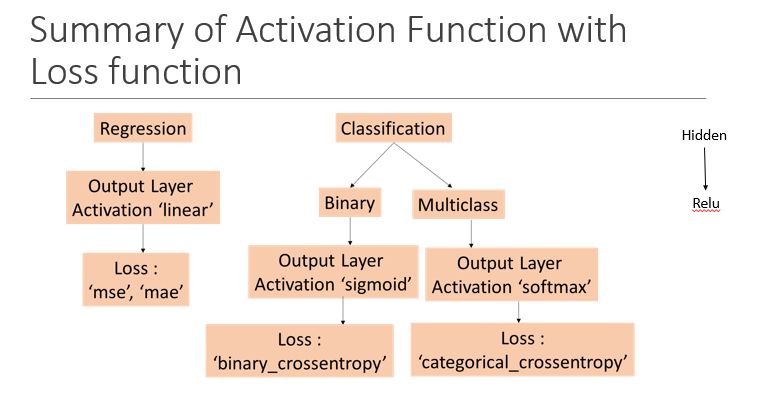

In [26]:
xtrain.shape[1]

4

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [28]:
model = Sequential(
    layers = [
        Input(shape = (xtrain.shape[1], )),
        Dense(units = 8, activation = "relu"),
        Dense(units = 4, activation = "relu"),
        Dense(units = 1, activation = "linear")
    ]
)

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Compile the model and provide a loss function
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [31]:
# Train the model
hist = model.fit(xtrain_pre, ytrain, epochs=100, validation_split=0.2)

Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 206680.4062 - mae: 454.3145 - val_loss: 203470.3281 - val_mae: 450.8071
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 203008.2031 - mae: 450.3259 - val_loss: 195387.4688 - val_mae: 441.8426
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 192383.2969 - mae: 438.4235 - val_loss: 175770.3906 - val_mae: 419.0094
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 168779.3594 - mae: 410.3724 - val_loss: 140969.2812 - val_mae: 374.2205
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 130937.9922 - mae: 359.8175 - val_loss: 96802.4766 - val_mae: 305.9119
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 88105.1641 - mae: 289.5299 - val_loss: 57944.0938 - val_mae: 224.5997
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 53261.1133 - mae: 212.8409 - val_loss: 34691.3984 - val_mae: 161.1396
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32484.4590 - 

## Plot the learning curve

In [32]:
print(hist.history["loss"])

[205911.65625, 201014.15625, 187673.65625, 160715.125, 120513.578125, 78035.578125, 46372.02734375, 29852.212890625, 23130.328125, 19827.205078125, 17226.974609375, 14743.294921875, 12311.0947265625, 9946.9111328125, 7730.70458984375, 5757.57275390625, 4115.802734375, 2872.78173828125, 1982.3638916015625, 1356.28271484375, 920.2380981445312, 625.6835327148438, 430.76141357421875, 302.0149841308594, 216.68719482421875, 160.0210418701172, 121.98461151123047, 96.04576873779297, 77.63135528564453, 64.46856689453125, 54.95992660522461, 47.7264289855957, 42.29407501220703, 38.15659713745117, 35.030487060546875, 32.455257415771484, 30.394853591918945, 28.734418869018555, 27.407995223999023, 26.396427154541016, 25.41448974609375, 24.704561233520508, 24.12177276611328, 23.510696411132812, 23.123023986816406, 22.75261688232422, 22.38212013244629, 22.188526153564453, 21.910381317138672, 21.702571868896484, 21.604679107666016, 21.415544509887695, 21.304523468017578, 21.27435874938965, 21.242753982

In [33]:
print(hist.history["val_loss"])

[203470.328125, 195387.46875, 175770.390625, 140969.28125, 96802.4765625, 57944.09375, 34691.3984375, 25046.6328125, 21316.583984375, 18785.677734375, 16342.0908203125, 13908.2587890625, 11507.568359375, 9174.6142578125, 7026.078125, 5180.8037109375, 3708.425537109375, 2602.111328125, 1803.6038818359375, 1239.858642578125, 844.6084594726562, 581.2035522460938, 400.759765625, 282.21002197265625, 204.350341796875, 151.61846923828125, 116.46320343017578, 91.37300109863281, 73.86878204345703, 61.37852478027344, 52.648006439208984, 46.37738037109375, 41.174102783203125, 37.12390899658203, 34.26676559448242, 31.80034828186035, 30.01099967956543, 28.500038146972656, 27.102598190307617, 26.129535675048828, 25.14285659790039, 24.45408821105957, 24.06255340576172, 23.677276611328125, 23.003236770629883, 22.49407196044922, 22.27129554748535, 22.01184844970703, 21.863698959350586, 21.733142852783203, 21.910213470458984, 21.475051879882812, 21.2447509765625, 21.368661880493164, 21.426769256591797, 

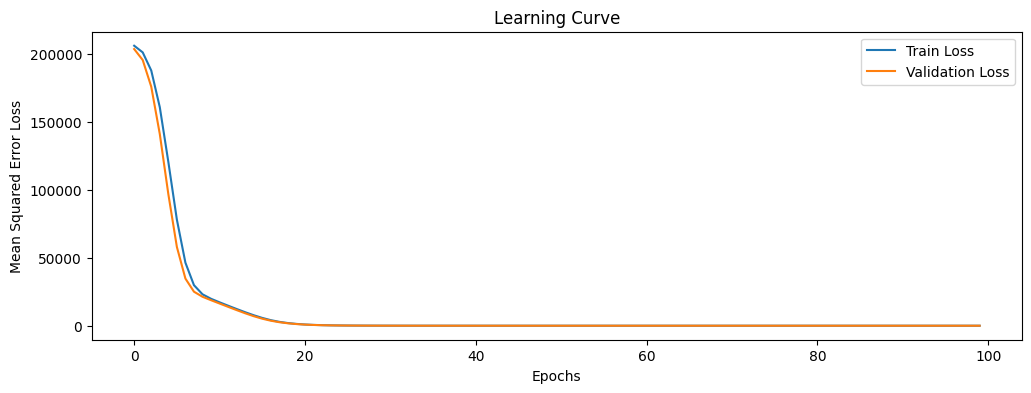

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

## Step 7 - Evaluate the model

In [35]:
train_mse, train_mae = model.evaluate(xtrain_pre, ytrain)
print(f"Train MSE : {train_mse:.2f}")
print(f"Train MAE : {train_mae:.2f}")

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.4212 - mae: 3.6119
Train MSE : 20.59
Train MAE : 3.60


In [36]:
test_mse, test_mae = model.evaluate(xtest_pre, ytest)
print(f"Test MSE : {test_mse:.2f}")
print(f"Test MAE : {test_mae:.2f}")


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.2625 - mae: 3.5289
Test MSE : 20.54
Test MAE : 3.62


In [37]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

def evaluate_model(model, x, y):
  ypred = model.predict(x)
  rmse = root_mean_squared_error(y, ypred)
  mae = mean_absolute_error(y, ypred)
  mape = mean_absolute_percentage_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f"RMSE : {rmse:.2f}")
  print(f"MAE : {mae:.2f}")
  print(f"MAPE : {mape:.2%}")
  print(f"R2 : {r2:.2%}")

In [38]:
print("Training Results : ")
evaluate_model(model, xtrain_pre, ytrain)

Training Results : 
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
RMSE : 4.54
MAE : 3.60
MAPE : 0.79%
R2 : 92.84%


In [39]:
print("Testing Results : ")
evaluate_model(model, xtest_pre, ytest)

Testing Results : 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
RMSE : 4.53
MAE : 3.62
MAPE : 0.80%
R2 : 93.19%


## Above results clearly show that this model is a good model and can be used for out of sample prediction r2 > 0.8 both in train and test

## Step 8 - Out of sample prediction

In [40]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [41]:
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [42]:
xnew.shape

(100, 4)

In [43]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [44]:
xnew_pre = pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380123,0.355958,-0.596825,0.810249
1,1.241431,0.046688,-1.030313,-1.836363
2,1.107989,1.488371,-2.015358,0.857571
3,0.811451,0.626666,-0.318516,0.048294
4,-1.012258,-1.061330,2.112049,-0.164999


In [45]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[445.6992 ],
       [439.28793],
       [430.67932],
       [440.39966],
       [474.02182]], dtype=float32)

## Save above in dataframe

In [46]:
xnew["PE_pred"] = preds.round(2)

In [47]:
xnew.head()

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.700012
1,28.88,54.89,1007.16,46.60,439.290009
2,27.89,73.21,1001.32,85.88,430.679993
3,25.69,62.26,1011.38,74.08,440.399994
4,12.16,40.81,1025.79,70.97,474.019989


In [48]:
xnew.to_csv("powerplant_results.csv", index=False)

## Save the preprocessor and model object

In [49]:
!pip install joblib

In [50]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [51]:
model

<Sequential name=sequential, built=True>

In [52]:
# save preprocessor using joblib
import joblib
joblib.dump(pipe, "pre.joblib")

['pre.joblib']

In [53]:
# Save neural network .keras
model.save("powerplant_model.keras")

## Load the preprocesor and model object

In [54]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [55]:
from tensorflow.keras.models import load_model

m = load_model("powerplant_model.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)